In [ ]:
!pip install contractions
!pip install emoji
!pip install ekphrasis
!pip install -U -q PyDrive
!pip install yfinance --upgrade --no-cache-dir

import pandas as pd
import re
import emoji
import nltk
import contractions
import torch

nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize 
from nltk.tokenize.treebank import TreebankWordDetokenizer
import requests 
from pprint import pprint
import numpy as np
from nltk.stem import PorterStemmer

import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime
from tensorflow import keras

import os
import pprint
import json
import random
import string
import sys
from ekphrasis.classes.segmenter import Segmenter
import itertools


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

import datetime
from datetime import datetime, timedelta, date

import yfinance as yf
from datetime import datetime, timedelta, date

#mount's to Google Drive
drive.mount('/content/drive')

#connect's to Google Cloud SDK
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/combined_0.csv')
df = df.sample(frac=1)
df.head()

,symbol,message,datetime,user,message_id,Date,Time,label
58864,T,apple iphone 6s sold online ahead retail launc...,2015-09-22 18:20:31,103546,42999318,2015-09-22,18:20:31,0
128223,PG,pg bro grow,2019-07-12 08:51:08,338648,170326612,2019-07-12,08:51:08,1
3042,T,like dividends 39 love 5 stocks pepe tgt wm,2020-06-01 17:34:03,257806,216258400,2020-06-01,17:34:03,1
133769,PG,pg verge breaking time highs,2018-11-13 19:13:41,1474209,144986374,2018-11-13,19:13:41,1
35675,T,flood twx sellers gone budge 30 easiest path s...,2018-08-06 19:13:46,853273,132817895,2018-08-06,19:13:46,0


In [ ]:
df.drop(df[df['Date'] <= '2019-07-20'].index, inplace = True)
df['label'].value_counts()

1    27545
0    25205
Name: label, dtype: int64

Here we start the process with regression. 
1. Splitting
2. train and predict
3. Random forest

4. Report

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], random_state = 42, test_size = 0.1)

In [ ]:
y_train.value_counts()

1    24746
0    22729
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

1    2799
0    2476
Name: label, dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
RandomForestClassifier(class_weight='blanced')
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', RandomForestClassifier())])
tuned_parameters = {'tfidf__use_idf': ['True'], 'clf__max_features':['sqrt'], 'clf__max_depth' : [5], 'clf__n_estimators':[200], 'clf__class_weight': ['balanced']}

In [ ]:
text_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__bootstrap', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__max_samples', 'clf__min_impurity_decrease', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__n_estimators', 'clf__n_jobs', 'clf__oob_score', 'clf__random_state', 'clf__verbose', 'clf__warm_start'])

In [ ]:
clf = GridSearchCV(text_clf, tuned_parameters)
clf.fit(X_train.values.astype('U'), y_train)

GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__class_weight': ['balanced'],
                         'clf__max_depth': [5], 'clf__max_features': ['sqrt'],
                         'clf__n_estimators': [200],
                         'tfidf__use_idf': ['True']})

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test.values.astype('U')), digits=4))

              precision    recall  f1-score   support

           0     0.5200    0.4519    0.4836      2476
           1     0.5655    0.6309    0.5964      2799

    accuracy                         0.5469      5275
   macro avg     0.5427    0.5414    0.5400      5275
weighted avg     0.5441    0.5469    0.5435      5275



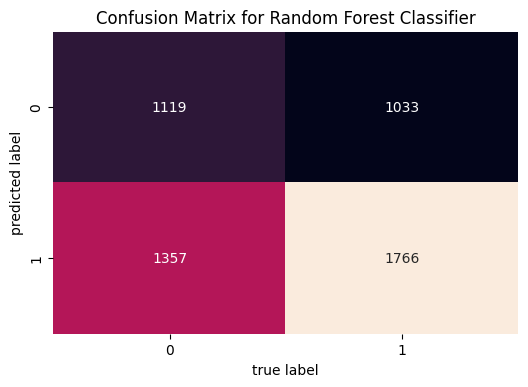

In [ ]:
# Generate the confusion matrix for the predicted values
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_forest = clf.predict(X_test.values.astype('U'))

plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_forest)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()